In [2]:


import matplotlib.pyplot as plt, numpy as np
from matplotlib.patches import Polygon


In [3]:
col_PCB='#009900'
col_RefPaint ="#bbbb66"
col_Scint = '#ddeeff'


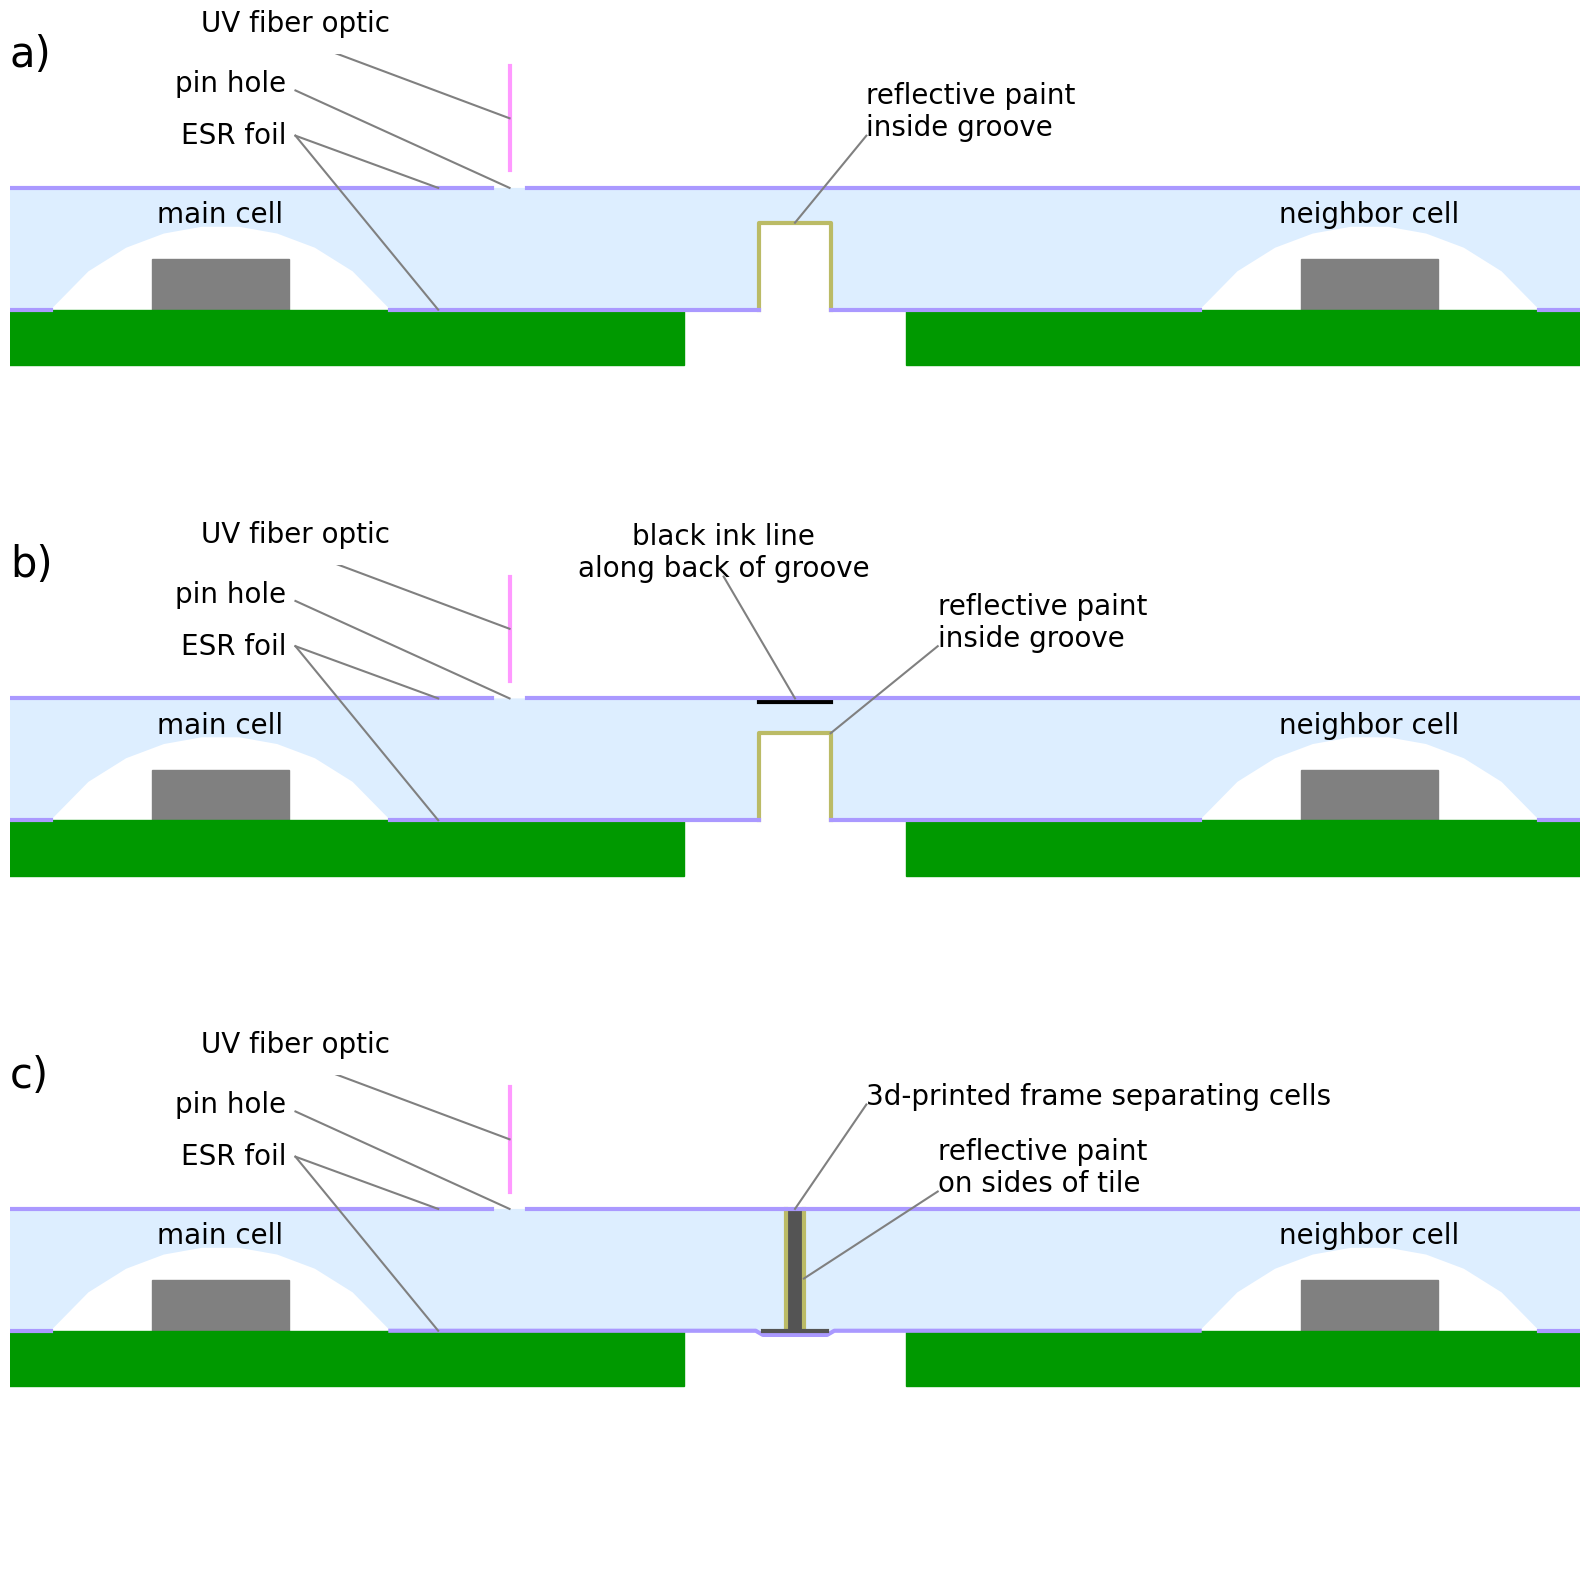

In [4]:
fig,axs = plt.subplots(3,1, figsize=(16, 16))


esr_color='#aa99ff'
fontsize=20
for i in range(3):
    w=22
    plt.sca(axs[i])
    plt.text(-w, 7,"abc"[i]+")",  fontsize=fontsize*1.5)
    
    a=1 if i != 2 else 0.25
    
    dimp_rad=9.52/2
    
    x=np.linspace(-16.1-dimp_rad,-16.1+dimp_rad,10)
    y=np.sqrt(5.91**2-(x+16.1)**2)-5.91+2.406
    iter1=zip(x,y)
    
    x=np.linspace(16.1-dimp_rad,16.1+dimp_rad, 10)
    y=np.sqrt(5.91**2-(x-16.1)**2)-5.91+2.406
    iter2=zip(x,y)
    
    points = [(-w,3.5), (-w,0),(-16.1-dimp_rad,0),*iter1,(-16.1+dimp_rad, 0),(-a, 0), (-a, 2.5), (a,2.5),(a,0), (16.1-dimp_rad,0), *iter2,(16.1+dimp_rad,0),(w,0),(w,3.5)]
    
    
    p = Polygon(points, facecolor = col_Scint)
    plt.gca().add_patch(p)
    
    plt.xlim(-w, w)
    plt.ylim(-w/3, w/3)
    
    if i == 0:
        a=2, 5
        plt.plot([a[0], 0], [a[1],2.5], color='0.5',  zorder=99)
        plt.text(*a, "reflective paint\ninside groove", fontsize=fontsize)
        plt.plot((-1, -1,1,1), (0, 2.5, 2.5,0), color=col_RefPaint, linewidth=3)
    if i == 1:
        a=-2, 7
        epsilon=.1
        plt.plot([a[0], 0], [a[1],3.5], color='0.5', zorder=99)
        plt.text(*a, "black ink line\nalong back of groove", fontsize=fontsize, horizontalalignment='center')
        a=4, 5
        plt.plot([a[0], 1], [a[1],2.5], color='0.5', zorder=99)
        plt.text(*a, "reflective paint\ninside groove", fontsize=fontsize)
        plt.plot((-1,1), (3.5-epsilon,3.5-epsilon), color='k', linewidth=3)
        plt.plot((-1, -1,1,1), (0, 2.5, 2.5,0), color='#bbbb66', linewidth=3)
    if i == 2:
        a=2, 6.5
        plt.plot([a[0], 0], [a[1],3.5], color='0.5', zorder=99)
        plt.text(*a, "3d-printed frame separating cells", fontsize=fontsize)
        plt.gca().add_patch(Polygon(((-0.25,3.5),(0.25, 3.5), (0.25, 0), (-0.25, 0)), color='0.33'))
        
        
        a=4, 4
        plt.plot([a[0], .25], [a[1], 1.5], color='0.5', zorder=99)
        plt.text(*a, "reflective paint\non sides of tile", fontsize=fontsize)
        
        plt.plot((-.25, -.25), (0, 3.5), color='#bbbb66', linewidth=3)
        plt.plot((.25, .25), (0, 3.5), color='#bbbb66', linewidth=3)
        
        #draw the shelf of the frame and also show that the foil slightly deforms under the shelf.  
        epsilon=0.0
        plt.plot([-0.9, 0.9], [epsilon,epsilon], color='0.33', zorder=99, linewidth=3)
        
    
    #SiPMs
    y0=0
    r=plt.Rectangle((-16.1-3.85/2, y0), 3.85, 1.45, color='0.5')
    plt.gca().add_patch(r)
    r=plt.Rectangle((16.1-3.85/2, y0), 3.85, 1.45, color='0.5')
    plt.gca().add_patch(r)
    
    #PCBs
    r=plt.Rectangle((-16.1-13, y0-1.6), 13*2, 1.6, color=col_PCB)
    plt.gca().add_patch(r)
    r=plt.Rectangle((16.1-13, y0-1.6), 13*2, 1.6, color=col_PCB)
    plt.gca().add_patch(r)
    
    
    #ESR foil
    epsilon=0 
    
    if i == 2:
        #plt.plot((-16.1+dimp_rad, 16.1-dimp_rad), (-epsilon,-epsilon), color=esr_color, linewidth=3)
        plt.plot((-16.1+dimp_rad, -1.1,-.9,.9, 1.1, 16.1-dimp_rad), (0,0,-.12,-.12, 0,0), color=esr_color, linewidth=3)
    else :
        plt.plot((-16.1+dimp_rad, -1), (-epsilon,-epsilon), color=esr_color, linewidth=3)
        plt.plot((1, 16.1-dimp_rad), (-epsilon,-epsilon), color=esr_color, linewidth=3)
    plt.plot((-16.1-dimp_rad, -w), (-epsilon,-epsilon), color=esr_color, linewidth=3)
    plt.plot((16.1+dimp_rad, w), (-epsilon,-epsilon), color=esr_color, linewidth=3)
    
    a=[-6,1.2]
    a=[-14, 5]
    plt.plot((a[0],-10), (a[1],3.5), color='0.5',zorder=99)
    plt.plot((a[0],-10), (a[1],0), color='0.5',zorder=99)
    plt.text(*a, "ESR foil ", fontsize=fontsize, horizontalalignment='right', verticalalignment='center')
    
    holex=-8
    holer=0.5
    plt.plot((-w, holex-holer), (3.5+epsilon,3.5+epsilon), color=esr_color,linewidth=3)
    plt.plot((holex+holer,w), (3.5+epsilon,3.5+epsilon), color=esr_color,linewidth=3)
    
    
    a=-14, 6.5
    
    plt.text(*a, "pin hole ", fontsize=fontsize, horizontalalignment='right', verticalalignment='center')
    plt.plot((a[0],holex),(a[1]-.2,3.5),color='0.5')
    
    
    #UV fiber optic lead
    plt.plot([holex,holex],[4,7],color='#ff99ff', linewidth=3)
    a=-14, 8
    plt.text(*a,"UV fiber optic", fontsize=fontsize, horizontalalignment='center')
    plt.plot((a[0],holex),(a[1]-.2,5.5),color='0.5')
    
    
    
    plt.axis('off')
    plt.text(-16.1, 2.5, "main cell", horizontalalignment='center', fontsize=fontsize)
    plt.text(16.1, 2.5, "neighbor cell", horizontalalignment='center', fontsize=fontsize)
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("crosstalk_setups.pdf")

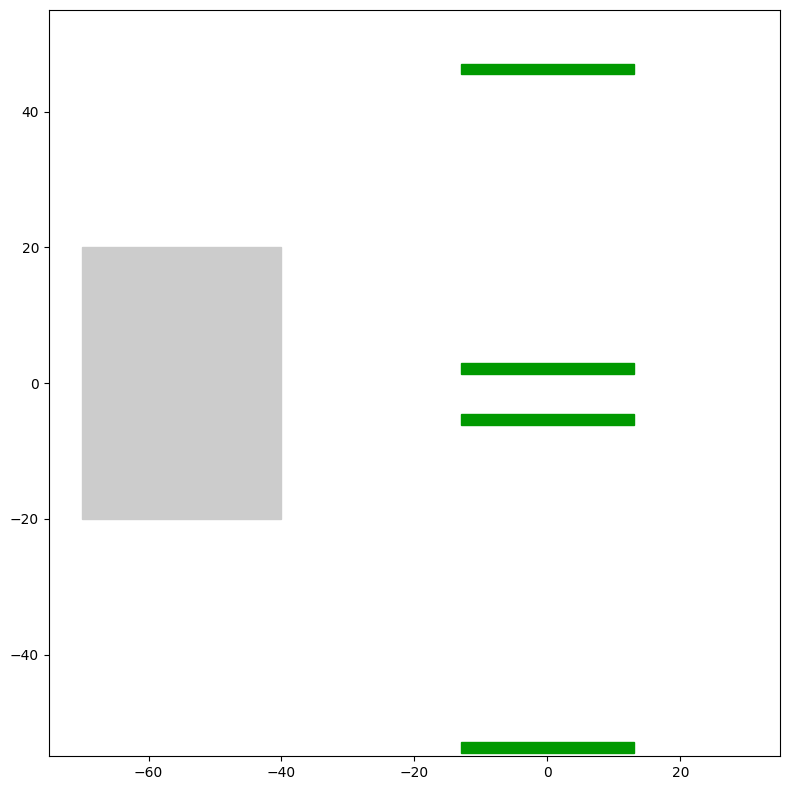

In [5]:
fig,ax = plt.subplots(1,1, figsize=(8, 8))
plt.sca(ax)

for y0 in -52.9, -4.6,3, 47.1:
    r=plt.Rectangle((-13, y0-1.6), 13*2, 1.6, color=col_PCB)
    plt.gca().add_patch(r)

plt.gca().add_patch(plt.Rectangle((-70, -20), 30, 40, color='0.8'))
a=55
plt.xlim(-a-20, a-20)
plt.ylim(-a, a)
#plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("cosmic_setup.pdf")
plt.show()

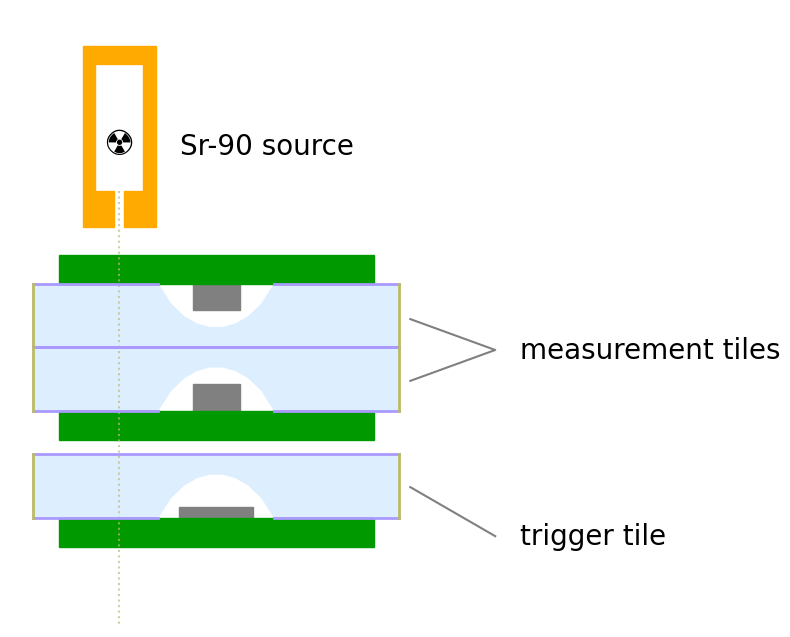

In [6]:
#fig,axs = plt.subplots(1,2, figsize=(16, 8))
fig,axs = plt.subplots(1,1, figsize=(8, 8*(34/42)))

for ipanel in range(1,2):
    #plt.sca(axs[ipanel])
    #plt.gca().set_title(["Sr-90 scan setup", "Sr-90 timing setup"][ipanel], fontsize=fontsize*1.3)

    plt.xlim(-17, 25)
    plt.ylim(-17, 17)
    
    def draw_tile(x0, y0, SiPM=None,orientation=1):
        dimp_rad=9.52/2

        x=np.linspace(x0-dimp_rad,x0+dimp_rad,10)
        y=(np.sqrt(5.91**2-(x-x0)**2)-5.91+2.406)*orientation+y0
        iter1=zip(x,y)


        points = [(x0-15.1,3.5*orientation+y0), (x0-15.1,y0),(x0-dimp_rad,y0),*iter1,
                  (x0+dimp_rad, y0), (x0+15.1,y0), (x0+15.1,y0+3.5*orientation)]


        p = Polygon(points, facecolor = col_Scint)
        plt.gca().add_patch(p)

        if SiPM=="3x3":
            #dimensions of the SiPM on the FNAL board
            r=plt.Rectangle((x0-3.85/2, y0), 3.85, 1.45*orientation, color='0.5')
            plt.gca().add_patch(r)
            #PCBs
            r=plt.Rectangle((x0-13, y0-1.6*orientation), 13*2, 1.6*orientation, color=col_PCB)
            plt.gca().add_patch(r)
        if SiPM=="6x6":
            #dimensions of the SiPM used on the SensL board
            r=plt.Rectangle((x0-6.1/2, y0), 6.1, .6, color='0.5')
            plt.gca().add_patch(r)
            #PCBs
            r=plt.Rectangle((x0-13, y0-1.6), 13*2, 1.6, color=col_PCB)
            plt.gca().add_patch(r)
        #ESR:
        plt.plot((x0-15.1, x0-dimp_rad), (y0,y0), color=esr_color, linewidth=2)
        plt.plot((x0+15.1, x0+dimp_rad), (y0,y0), color=esr_color, linewidth=2)
        plt.plot((x0+15.1, x0-15.1), (y0+3.5*orientation,y0+3.5*orientation), color=esr_color, linewidth=2)
        #reflective paint
        plt.plot((x0+15.1, x0+15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=2)
        plt.plot((x0-15.1, x0-15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=2)
    #plt.xlim(-50, 50)
    #plt.ylim(-70, 30)

    
    
    #trigger tiles
    xa = -10 if ipanel==0 else -8
    
    #radioactive symbol
    plt.text(xa, 9,"\u2622", color='k', horizontalalignment='center', fontsize=25)
    w=3
    p= Polygon(((xa-w, 15), (xa+w, 15), (xa+w, 5), (xa+.4,5), (xa+.4, 7), (xa+2, 7),(xa+2, 14),
                (xa-2, 14), (xa-2, 7), (xa-.4, 7),(xa-.4,5), (xa-w, 5)), color='#ffaa00')
    plt.gca().add_patch(p)
    a=(xa+5,9)
    plt.text(*a, "Sr-90 source", fontsize=fontsize)
    plt.plot((xa,xa), (7,-60), linestyle=':', color='#bbbb77', alpha=0.7,linewidth=1.5)
    
    if ipanel==1:
        xa=0
    
    y1=-11
    #y2=-40
    draw_tile(xa,y1,"6x6")
    #draw_tile(xa,y2,"6x6")
    
    #a=(xa+25, (y1+y2)/2)
    #plt.text(*a, "trigger tiles", verticalalignment='center',fontsize=fontsize)
    #plt.plot((xa+16, a[0]-2, xa+16),(y1+1.7, (y1+y2)/2, y2+1.7), linestyle='-', color='0.5')
    a=(xa+25, y1-1)
    plt.text(*a, "trigger tile", verticalalignment='center',fontsize=fontsize)
    plt.plot((xa+16, a[0]-2),(y1+1.7, a[1]), linestyle='-', color='0.5')
    
    
    if ipanel==0:
        draw_tile(0,0,"3x3")
        draw_tile(-30.6,0)
        draw_tile(30.6,0)
        #frame separating tiles
        plt.plot((-15.3, -15.3),(0, 3.5),color='k')
        plt.plot((15.3, 15.3),(0, 3.5),color='k')
        
        #arrows:
        def draw_perspective(x1,z1,x2,z2):
            z1+=0.5
            z2+=0.5
            plt.plot((20+1.5*(x1-20)/z1, 20+1.5*(x2-20)/z2), (40-1.5*20/z1, 40-1.5*20/z2), color='k')
        draw_perspective(xa-16, 1, xa+16, 1)
        draw_perspective(xa, 1.2, xa, .8)
        draw_perspective(xa-16, 1, xa-12, .95)
        draw_perspective(xa-16, 1, xa-12, 1.05)
        draw_perspective(xa+16, 1, xa+12, .95)
        draw_perspective(xa+16, 1, xa+12, 1.05)
        draw_perspective(xa, 1.2, xa-4, 1.15)
        draw_perspective(xa, 1.2, xa+4, 1.15)
        draw_perspective(xa, 0.8, xa-4, 0.85)
        draw_perspective(xa, 0.8, xa+4, 0.85)
        
        #plt.plot((xa-14, xa+14), (20,20), color='k')
        #plt.plot((xa-6, xa+6), (16,24), color='k')
        #plt.plot((xa-8,xa-14, xa-10), (21,20, 19), color='k')
        #plt.plot((xa+10,xa+14, xa+8), (21,20, 19), color='k')
        #plt.plot((xa-10, xa+10), (15,25), color='k')
        
    else:
        draw_tile(0,3.5-1.6,"3x3",-1)
        draw_tile(0,-3.5-1.6,"3x3",1)
        a=(25, -3.5/2)
        plt.text(*a, "measurement tiles", verticalalignment='center',fontsize=fontsize)
        plt.plot((16, a[0]-2, 16),(a[1]+1.7, a[1], a[1]-1.7), linestyle='-', color='0.5')

    
    
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("radioactive_setup.pdf")

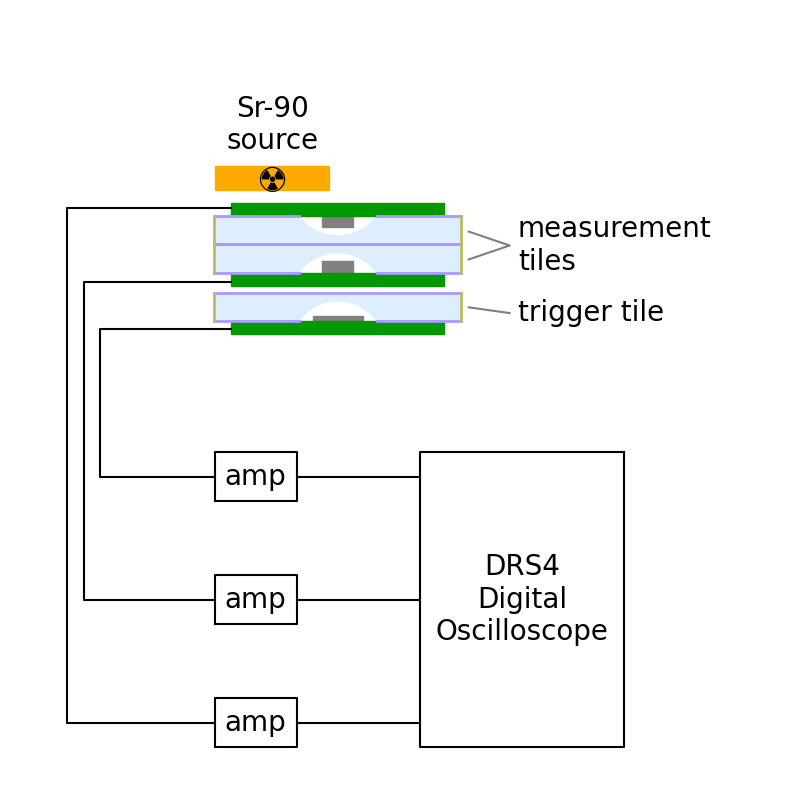

In [143]:
#fig,axs = plt.subplots(1,2, figsize=(16, 8))
fig,axs = plt.subplots(1,1, figsize=(8, 8))

for ipanel in range(1,2):
    #plt.sca(axs[ipanel])
    #plt.gca().set_title(["Sr-90 scan setup", "Sr-90 timing setup"][ipanel], fontsize=fontsize*1.3)

    plt.xlim(-40, 54)
    plt.ylim(-67, 27)
    
    def draw_tile(x0, y0, SiPM=None,orientation=1):
        dimp_rad=9.52/2

        x=np.linspace(x0-dimp_rad,x0+dimp_rad,10)
        y=(np.sqrt(5.91**2-(x-x0)**2)-5.91+2.406)*orientation+y0
        iter1=zip(x,y)


        points = [(x0-15.1,3.5*orientation+y0), (x0-15.1,y0),(x0-dimp_rad,y0),*iter1,
                  (x0+dimp_rad, y0), (x0+15.1,y0), (x0+15.1,y0+3.5*orientation)]


        p = Polygon(points, facecolor = col_Scint)
        plt.gca().add_patch(p)

        if SiPM=="3x3":
            #dimensions of the SiPM on the FNAL board
            r=plt.Rectangle((x0-3.85/2, y0), 3.85, 1.45*orientation, color='0.5')
            plt.gca().add_patch(r)
            #PCBs
            r=plt.Rectangle((x0-13, y0-1.6*orientation), 13*2, 1.6*orientation, color=col_PCB)
            plt.gca().add_patch(r)
        if SiPM=="6x6":
            #dimensions of the SiPM used on the SensL board
            r=plt.Rectangle((x0-6.1/2, y0), 6.1, .6, color='0.5')
            plt.gca().add_patch(r)
            #PCBs
            r=plt.Rectangle((x0-13, y0-1.6), 13*2, 1.6, color=col_PCB)
            plt.gca().add_patch(r)
        #ESR:
        plt.plot((x0-15.1, x0-dimp_rad), (y0,y0), color=esr_color, linewidth=2)
        plt.plot((x0+15.1, x0+dimp_rad), (y0,y0), color=esr_color, linewidth=2)
        plt.plot((x0+15.1, x0-15.1), (y0+3.5*orientation,y0+3.5*orientation), color=esr_color, linewidth=2)
        #reflective paint
        plt.plot((x0+15.1, x0+15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=2)
        plt.plot((x0-15.1, x0-15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=2)
    #plt.xlim(-50, 50)
    #plt.ylim(-70, 30)

    
    
    #trigger tiles
    xa = -10 if ipanel==0 else -8
    
    #radioactive symbol
#     plt.text(xa, 9,"\u2622", color='k', horizontalalignment='center', fontsize=25)
#     w=3
#     p= Polygon(((xa-w, 15), (xa+w, 15), (xa+w, 5), (xa+.4,5), (xa+.4, 7), (xa+2, 7),(xa+2, 14),
#                 (xa-2, 14), (xa-2, 7), (xa-.4, 7),(xa-.4,5), (xa-w, 5)), color='#ffaa00')
#     plt.gca().add_patch(p)
#     a=(xa,16)
#     plt.text(*a, "Sr-90\nsource", fontsize=fontsize, horizontalalignment='center')
    
    plt.text(xa, 6,"\u2622", color='k', horizontalalignment='center', fontsize=25, verticalalignment='center')
    w=7
    p= Polygon(((xa-w, 5), (xa+w, 5), (xa+w, 8), (xa-w, 8)), color='#ffaa00')
    plt.gca().add_patch(p)
    a=(xa,10)
    plt.text(*a, "Sr-90\nsource", fontsize=fontsize, horizontalalignment='center')
    
    
    
    
    #plt.plot((xa,xa), (7,-15), linestyle=':', color='#bbbb77', alpha=0.7,linewidth=1.5)
    
    if ipanel==1:
        xa=0
    
    y1=-11
    #y2=-40
    draw_tile(xa,y1,"6x6")
    #draw_tile(xa,y2,"6x6")
    
    #a=(xa+25, (y1+y2)/2)
    #plt.text(*a, "trigger tiles", verticalalignment='center',fontsize=fontsize)
    #plt.plot((xa+16, a[0]-2, xa+16),(y1+1.7, (y1+y2)/2, y2+1.7), linestyle='-', color='0.5')
    a=(xa+22, y1+1)
    plt.text(*a, "trigger tile", verticalalignment='center',fontsize=fontsize)
    plt.plot((xa+16, a[0]-1),(y1+1.7, a[1]), linestyle='-', color='0.5')
    
    
    if ipanel==0:
        draw_tile(0,0,"3x3")
        draw_tile(-30.6,0)
        draw_tile(30.6,0)
        #frame separating tiles
        plt.plot((-15.3, -15.3),(0, 3.5),color='k')
        plt.plot((15.3, 15.3),(0, 3.5),color='k')
        
        #arrows:
        def draw_perspective(x1,z1,x2,z2):
            z1+=0.5
            z2+=0.5
            plt.plot((20+1.5*(x1-20)/z1, 20+1.5*(x2-20)/z2), (40-1.5*20/z1, 40-1.5*20/z2), color='k')
        draw_perspective(xa-16, 1, xa+16, 1)
        draw_perspective(xa, 1.2, xa, .8)
        draw_perspective(xa-16, 1, xa-12, .95)
        draw_perspective(xa-16, 1, xa-12, 1.05)
        draw_perspective(xa+16, 1, xa+12, .95)
        draw_perspective(xa+16, 1, xa+12, 1.05)
        draw_perspective(xa, 1.2, xa-4, 1.15)
        draw_perspective(xa, 1.2, xa+4, 1.15)
        draw_perspective(xa, 0.8, xa-4, 0.85)
        draw_perspective(xa, 0.8, xa+4, 0.85)
        
        #plt.plot((xa-14, xa+14), (20,20), color='k')
        #plt.plot((xa-6, xa+6), (16,24), color='k')
        #plt.plot((xa-8,xa-14, xa-10), (21,20, 19), color='k')
        #plt.plot((xa+10,xa+14, xa+8), (21,20, 19), color='k')
        #plt.plot((xa-10, xa+10), (15,25), color='k')
        
    else:
        draw_tile(0,3.5-1.6,"3x3",-1)
        draw_tile(0,-3.5-1.6,"3x3",1)
        a=(22, -3.5/2)
        plt.text(*a, "measurement\ntiles", verticalalignment='center',fontsize=fontsize, horizontalalignment='left')
        plt.plot((16, a[0]-1, 16),(a[1]+1.7, a[1], a[1]-1.7), linestyle='-', color='0.5')

    
    #block diagram elements
    #plt.plot((-13, -20), (2.8, 2.8), color='k')
    #plt.plot((-13, -20), (-6.2, -6.2), color='k')
    #plt.plot((-13, -16, -16,-20), (-12, -12, -15.2, -15.2), color='k')
    
    #plt.plot((-13, -23, -23,25,25, 20), (2.8, 2.8, -22,-22, -30,-30), color='k')
    #plt.plot((-13, -21, -21,27,27, 20), (-6.2, -6.2, -20, -20, -45, -45), color='k')
    #plt.plot((-13, -19, -19,29,29, 20), (-12, -12, -18, -18, -60, -60), color='k')
    
    plt.plot((-13, -33, -33, -15), (2.8, 2.8, -60,-60), color='k')
    plt.plot((-13, -31, -31, -15), (-6.2, -6.2,  -45, -45), color='k')
    plt.plot((-13, -29, -29, -15), (-12, -12, -30, -30), color='k')
    
    
    
    for y in [-30, -45, -60]:
        x1,x2=-15,-5
        dy=3
        plt.text((x1+x2)/2, y, "amp", verticalalignment='center',fontsize=fontsize, horizontalalignment='center')
        plt.plot((x1, x2, x2, x1, x1), (y-dy, y-dy, y+dy,y+dy, y-dy), color='k')
        plt.plot((x2, 10), (y,y), color='k')
    x1,y1, x2,y2=35, -27, 10, -63
    plt.plot((x1, x2, x2, x1,x1), (y1, y1, y2,y2, y1), color='k')
    plt.text((x1+x2)/2, (y1+y2)/2, "DRS4\nDigital\nOscilloscope", fontsize=fontsize,horizontalalignment='center',
            verticalalignment='center')
    
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("radioactive_setup.pdf")

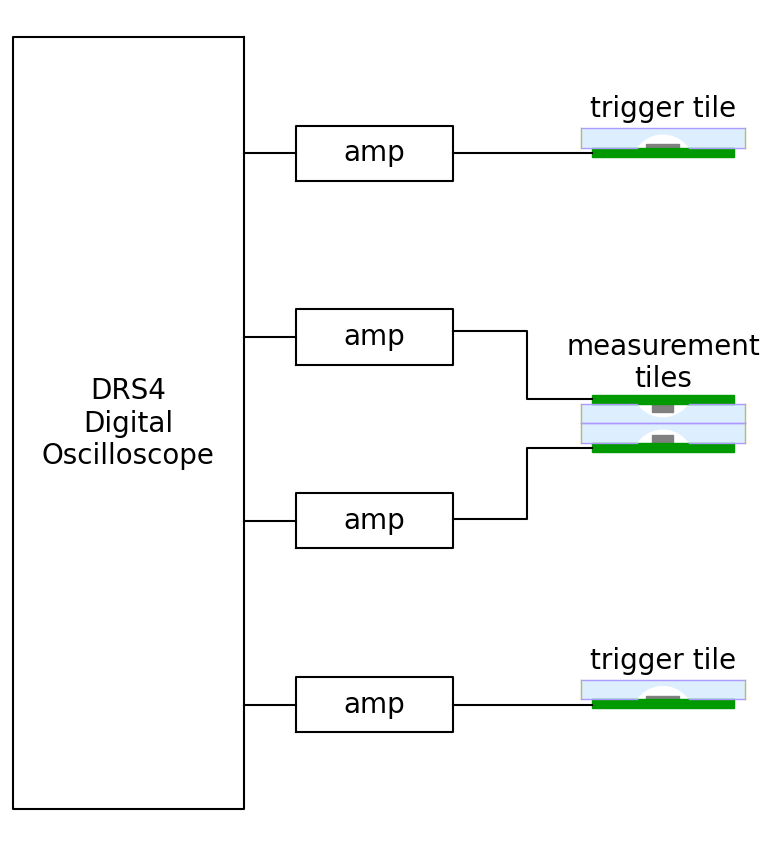

In [134]:
#fig,axs = plt.subplots(1,2, figsize=(16, 8))
fig,axs = plt.subplots(1,1, figsize=(8, 8*150/(20+120)))

#plt.sca(axs[ipanel])
#plt.gca().set_title(["Sr-90 scan setup", "Sr-90 timing setup"][ipanel], fontsize=fontsize*1.3)

plt.xlim(-120, 20)
plt.ylim(-75, 75)

def draw_tile(x0, y0, SiPM=None,orientation=1):
    dimp_rad=9.52/2

    x=np.linspace(x0-dimp_rad,x0+dimp_rad,10)
    y=(np.sqrt(5.91**2-(x-x0)**2)-5.91+2.406)*orientation+y0
    iter1=zip(x,y)


    points = [(x0-15.1,3.5*orientation+y0), (x0-15.1,y0),(x0-dimp_rad,y0),*iter1,
              (x0+dimp_rad, y0), (x0+15.1,y0), (x0+15.1,y0+3.5*orientation)]


    p = Polygon(points, facecolor = col_Scint)
    plt.gca().add_patch(p)

    if SiPM=="3x3":
        #dimensions of the SiPM on the FNAL board
        r=plt.Rectangle((x0-3.85/2, y0), 3.85, 1.45*orientation, color='0.5')
        plt.gca().add_patch(r)
        #PCBs
        r=plt.Rectangle((x0-13, y0-1.6*orientation), 13*2, 1.6*orientation, color=col_PCB)
        plt.gca().add_patch(r)
    if SiPM=="6x6":
        #dimensions of the SiPM used on the SensL board
        r=plt.Rectangle((x0-6.1/2, y0), 6.1, .6, color='0.5')
        plt.gca().add_patch(r)
        #PCBs
        r=plt.Rectangle((x0-13, y0-1.6), 13*2, 1.6, color=col_PCB)
        plt.gca().add_patch(r)
    #ESR:
    plt.plot((x0-15.1, x0-dimp_rad), (y0,y0), color=esr_color, linewidth=1)
    plt.plot((x0+15.1, x0+dimp_rad), (y0,y0), color=esr_color, linewidth=1)
    plt.plot((x0+15.1, x0-15.1), (y0+3.5*orientation,y0+3.5*orientation), color=esr_color, linewidth=1)
    #reflective paint
    plt.plot((x0+15.1, x0+15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=1)
    plt.plot((x0-15.1, x0-15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=1)
#plt.xlim(-50, 50)
#plt.ylim(-70, 30)


xa=0


y1=-11
#y2=-40
draw_tile(xa,50,"6x6")

draw_tile(xa,-50,"6x6")
a=(0, 50+7)
plt.text(*a, "trigger tile", verticalalignment='center',fontsize=fontsize, horizontalalignment='center')
#plt.plot((16, a[0]-2),(50+2, a[1]), linestyle='-', color='0.5',linewidth=1)
a=(0, -50+7)
plt.text(*a, "trigger tile", verticalalignment='center',fontsize=fontsize, horizontalalignment='center')
#plt.plot((16, a[0]-2),(-50+2, a[1]), linestyle='-', color='0.5',linewidth=1)

#draw_tile(xa,y2,"6x6")

#a=(xa+25, (y1+y2)/2)
#plt.text(*a, "trigger tiles", verticalalignment='center',fontsize=fontsize)
#plt.plot((xa+16, a[0]-2, xa+16),(y1+1.7, (y1+y2)/2, y2+1.7), linestyle='-', color='0.5')
#a=(xa+60, y1-1)
#plt.text(*a, "trigger tile", verticalalignment='center',fontsize=fontsize)
#plt.plot((xa+16, a[0]-2),(y1+1.7, a[1]), linestyle='-', color='0.5')


#measurement tiles
draw_tile(0,3.5,"3x3",-1)
draw_tile(0,-3.5,"3x3",1)
a=(0, 11)
plt.text(*a, "measurement\ntiles", verticalalignment='center',fontsize=fontsize, horizontalalignment='center')
#plt.plot((16, a[0]-2, 16),(1.7, a[1], -1.7), linestyle='-', color='0.5',linewidth=1)


#now for the electrical connections block diagram
plt.plot((-13, -38.5), (49, 49), color='k')
plt.plot((-13,-25,-25, -38.5), (4.5, 4.5, 16.7, 16.7), color='k')
plt.plot((-13,-25,-25, -38.5), (-4.5,-4.5, -17.3, -17.3), color='k')
plt.plot((-13, -38.5), (-51, -51), color='k')


for y in np.linspace(-51, 49, 4):
    x1,x2=-67.5,-38.5
    plt.text((x1+x2)/2, y, "amp", verticalalignment='center',fontsize=fontsize, horizontalalignment='center')
    plt.plot((x1, x2, x2, x1, x1), (y-5, y-5, y+5,y+5, y-5), color='k')
    plt.plot((x1, -77), (y,y), color='k')

plt.plot((-77, -119.5, -119.5, -77, -77), (70, 70, -70, -70, 70), color='k')    

plt.text((-77-119.5)/2, 0, "DRS4\nDigital\nOscilloscope",horizontalalignment='center', verticalalignment='center',fontsize=fontsize) 

#cosmic ray
#plt.plot((-14, 7), (75, -75), color='#aa33aa', alpha=0.5)
        
plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("cosmic_setup_block_diagram.pdf")

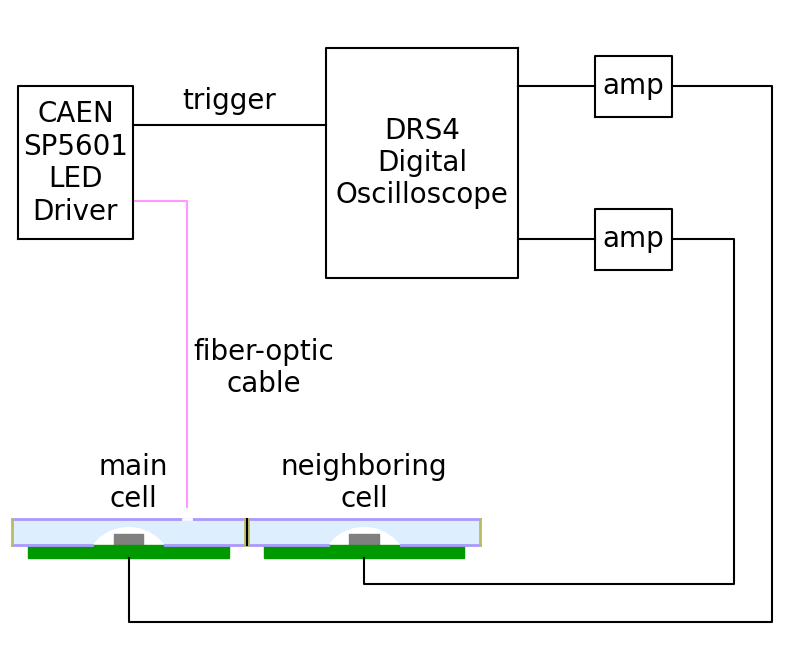

In [145]:
#fig,axs = plt.subplots(1,2, figsize=(16, 8))
fig,axs = plt.subplots(1,1, figsize=(8, 8*.85))

for ipanel in range(0,1):
    #plt.sca(axs[ipanel])
    #plt.gca().set_title(["Sr-90 scan setup", "Sr-90 timing setup"][ipanel], fontsize=fontsize*1.3)
    plt.xlim(-46, 54)
    plt.ylim(-15, 70)
    
    def draw_tile(x0, y0, SiPM=None,orientation=1):
        dimp_rad=9.52/2

        x=np.linspace(x0-dimp_rad,x0+dimp_rad,10)
        y=(np.sqrt(5.91**2-(x-x0)**2)-5.91+2.406)*orientation+y0
        iter1=zip(x,y)


        points = [(x0-15.1,3.5*orientation+y0), (x0-15.1,y0),(x0-dimp_rad,y0),*iter1,
                  (x0+dimp_rad, y0), (x0+15.1,y0), (x0+15.1,y0+3.5*orientation)]


        p = Polygon(points, facecolor = col_Scint)
        plt.gca().add_patch(p)

        if SiPM=="3x3":
            #dimensions of the SiPM on the FNAL board
            r=plt.Rectangle((x0-3.85/2, y0), 3.85, 1.45*orientation, color='0.5')
            plt.gca().add_patch(r)
            #PCBs
            r=plt.Rectangle((x0-13, y0-1.6*orientation), 13*2, 1.6*orientation, color=col_PCB)
            plt.gca().add_patch(r)
        if SiPM=="6x6":
            #dimensions of the SiPM used on the SensL board
            r=plt.Rectangle((x0-6.1/2, y0), 6.1, .6, color='0.5')
            plt.gca().add_patch(r)
            #PCBs
            r=plt.Rectangle((x0-13, y0-1.6), 13*2, 1.6, color=col_PCB)
            plt.gca().add_patch(r)
        #ESR:
        plt.plot((x0-15.1, x0-dimp_rad), (y0,y0), color=esr_color, linewidth=2)
        plt.plot((x0+15.1, x0+dimp_rad), (y0,y0), color=esr_color, linewidth=2)
        plt.plot((x0+15.1, x0-15.1), (y0+3.5*orientation,y0+3.5*orientation), color=esr_color, linewidth=2)
        #reflective paint
        plt.plot((x0+15.1, x0+15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=2)
        plt.plot((x0-15.1, x0-15.1), (y0, y0+3.5*orientation), color='#bbbb66', linewidth=2)


    
    
    #trigger tiles
    xa = -10 if ipanel==0 else -8
    
#     #radioactive symbol
#     plt.text(xa, 9,"\u2622", color='k', horizontalalignment='center', fontsize=25)
#     w=3
#     p= Polygon(((xa-w, 15), (xa+w, 15), (xa+w, 5), (xa+.4,5), (xa+.4, 7), (xa+2, 7),(xa+2, 14),
#                 (xa-2, 14), (xa-2, 7), (xa-.4, 7),(xa-.4,5), (xa-w, 5)), color='#ffaa00')
#     plt.gca().add_patch(p)
#     a=(xa+5,9)
#     plt.text(*a, "Sr-90 source", fontsize=fontsize)
#     plt.plot((xa,xa), (7,-60), linestyle=':', color='#bbbb77', alpha=0.7,linewidth=1.5)
    
    
    
    
    draw_tile(0,0,"3x3")
    draw_tile(-30.6,0, "3x3")
    #draw_tile(30.6,0)
    #frame separating tiles
    plt.plot((-15.2, -15.2),(0, 3.5),color='k')
    #plt.plot((15.3, 15.3),(0, 3.5),color='k')
        
    #label cells:
    plt.text(-30, 5, "main\ncell", horizontalalignment='center', fontsize=fontsize)
    plt.text(0, 5, "neighboring\ncell", horizontalalignment='center', fontsize=fontsize)
    
    #pinhole
    plt.plot((-23.5, -22.5), (3.5, 3.5), color='#ffffff', linewidth=2)
    #fiber optic
    plt.plot((-23, -23,-30), (5, 45, 45), color='#ff99ff')

    y=[60, 40]
    plt.plot((-30.5, -30.5, 53, 53, 40), (-1.6, -10, -10, y[0], y[0]), color='k')
    plt.plot((0, 0, 48, 48, 40), (-1.6, -5, -5, y[1], y[1]), color='k')
    
    #amps
    for y0 in y:
        x1,x2=30,40
        plt.text((x1+x2)/2, y0, "amp", verticalalignment='center',fontsize=fontsize, horizontalalignment='center')
        dy=4
        plt.plot((x1, x2, x2, x1, x1), (y0-dy, y0-dy, y0+dy,y0+dy, y0-dy), color='k')
        plt.plot((x1, 20), (y0,y0), color='k')
    #oscilloscope
    plt.plot((20, -5, -5, 20, 20),(65, 65, 35, 35, 65), color='k')
    plt.text(7.5, 50, "DRS4\nDigital\nOscilloscope", horizontalalignment='center', verticalalignment='center',
            fontsize=fontsize)
    
    plt.plot((-45, -30, -30, -45,-45), (40, 40, 60, 60,40), color='k')
    plt.text(-37.5, 50, "CAEN\nSP5601\nLED\nDriver", horizontalalignment='center', 
             verticalalignment='center', fontsize=fontsize)
    plt.plot((-30, -5), (55,55), color='k')
    plt.text(-17.5,57, "trigger", fontsize=fontsize, horizontalalignment='center')
    
    plt.text(-13, 20, "fiber-optic\ncable", fontsize=fontsize, horizontalalignment='center')
    
    plt.axis('off')

plt.tight_layout()
plt.subplots_adjust(hspace=0)
plt.savefig("led_setup_blockdiagram.pdf")